# Installing Libraries

In [ ]:
!pip install -q scikit-learn==1.4.1.post1 numpy pandas altair graphviz

# Training and Visualzing Decision Tree
Scikit-learn의 Decision Tree 구현체들은 [sklearn.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)에 존재하며, CART 기반 Decision Tree는 [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)에 구현되어 있다.

이 실습에서는 간단하게 Iris 데이터로 Decision Tree를 훈련하고 시각화해보자.



In [ ]:
from sklearn.datasets import load_iris


data = load_iris(as_frame=True)
X, y = data.data, data.target

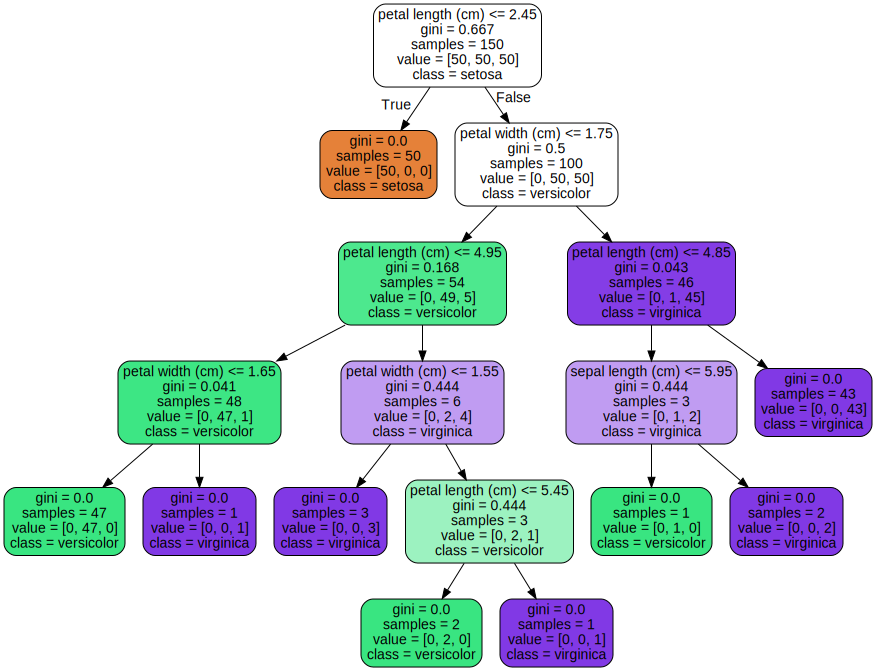

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


model = DecisionTreeClassifier(random_state=42).fit(X=X, y=y)
source = export_graphviz(
    model, feature_names=data.feature_names, class_names=data.target_names,
    filled=True, rounded=True
)
graphviz.Source(source)

# Variance of Decision Trees

Decision Tree는 초매개변수나 데이터에 미세한 변화에 따라 완전히 다른 기준을 가지는 트리가 생성될 수 있다. 그 영향을 확인하기 위해서, 다른 **random_state**를 설정해보자.


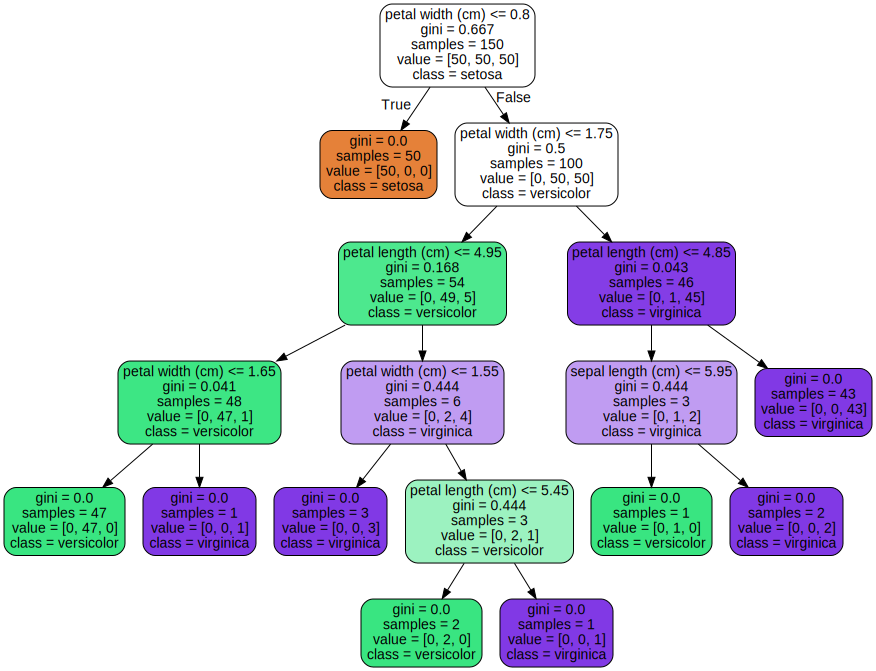

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


model = DecisionTreeClassifier(random_state=12).fit(X=X, y=y)
source = export_graphviz(
    model, feature_names=data.feature_names, class_names=data.target_names,
    filled=True, rounded=True
)
graphviz.Source(source)

Root Node의 Gini impurity는 동일하나 기준이 다른 걸 확인할 수 있다.

# Hyperparameter
Decision Tree의 대표적인 초매개변수의 효과를 확인해보자. 이를 위해 가상의 데이터를 만든다.

In [ ]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=150, noise=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import graphviz


model1 = DecisionTreeClassifier(min_samples_leaf=1, random_state=42).fit(X, y)
model2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42).fit(X, y)

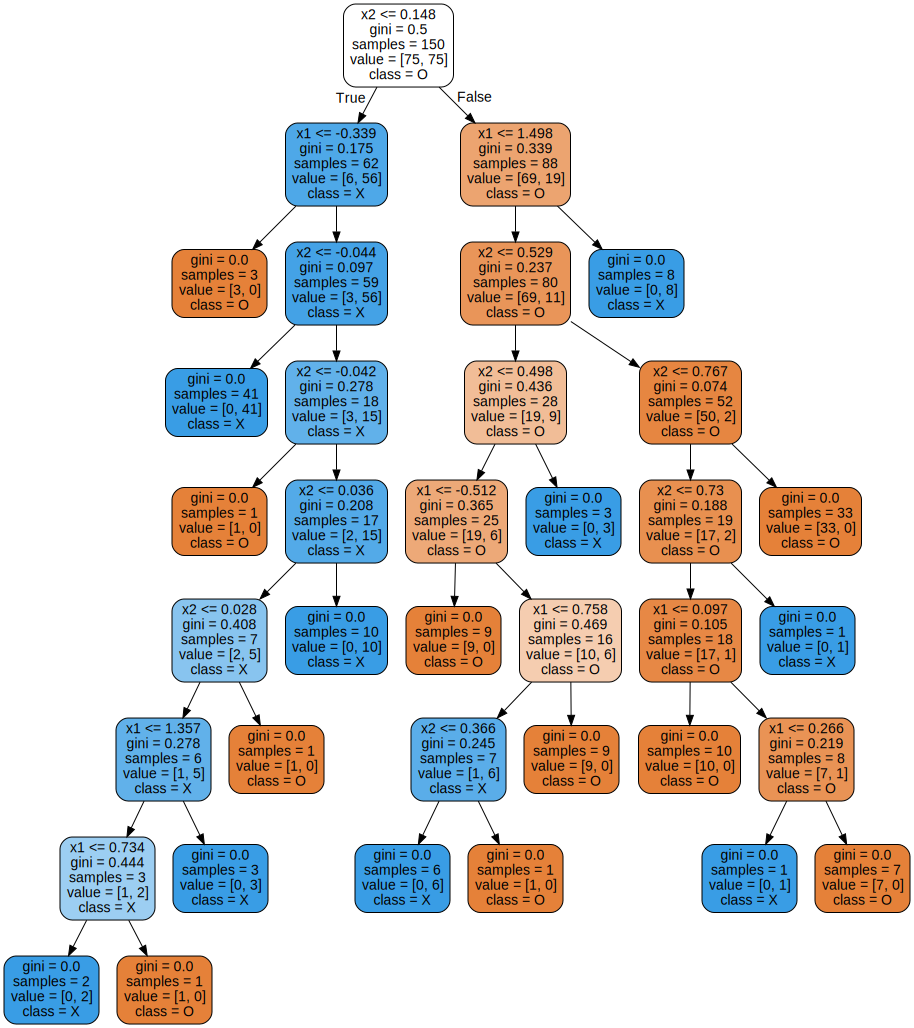

In [ ]:
from sklearn.tree import export_graphviz
import graphviz


source = export_graphviz(
    model1, feature_names=['x1', 'x2'], class_names=['O', 'X'],
    filled=True, rounded=True
)
graphviz.Source(source)

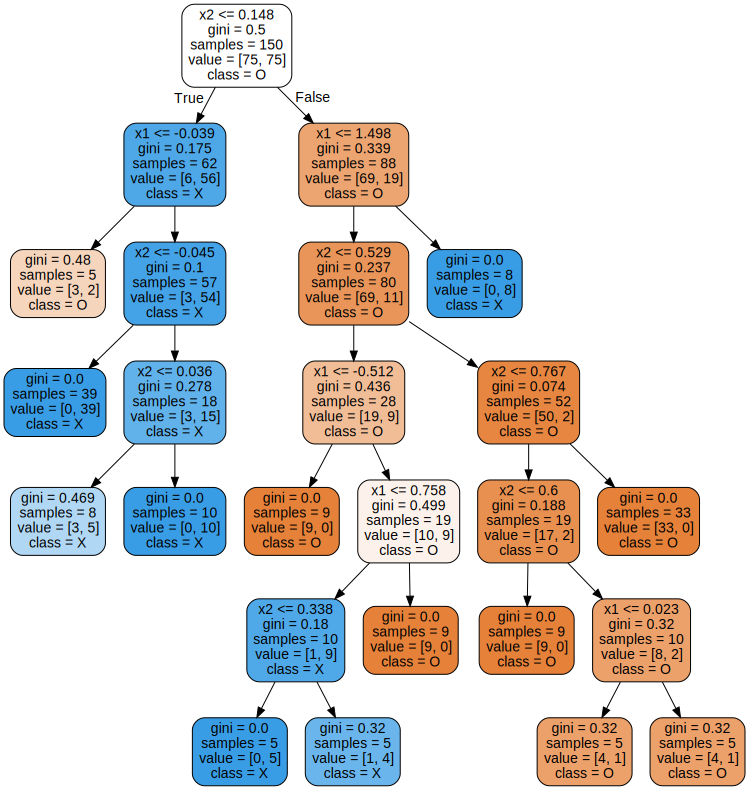

In [ ]:
from sklearn.tree import export_graphviz
import graphviz


source = export_graphviz(
    model2, feature_names=['x1', 'x2'], class_names=['O', 'X'],
    filled=True, rounded=True
)
graphviz.Source(source)

Leaf Node의 최소 샘플수를 5개로 설정한 두 번째 모델의 경우 트리의 깊이가 얕아진 것을 알 수 있다.

이번엔 직접 깊이를 조정해보자.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import graphviz


model1 = DecisionTreeClassifier(max_depth=None, random_state=42).fit(X, y)
model2 = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X, y)

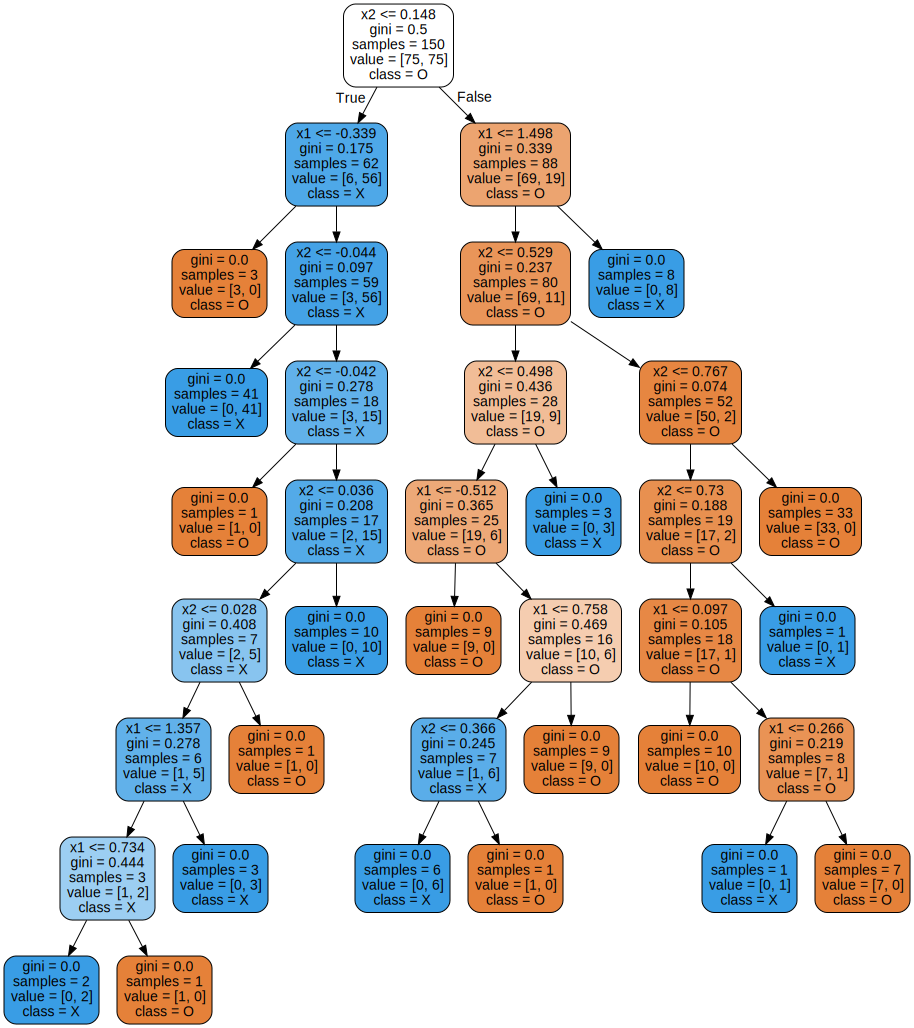

In [ ]:
from sklearn.tree import export_graphviz
import graphviz


source = export_graphviz(
    model1, feature_names=['x1', 'x2'], class_names=['O', 'X'],
    filled=True, rounded=True
)
graphviz.Source(source)

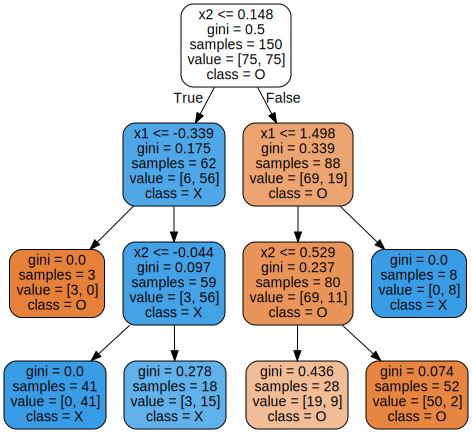

In [ ]:
from sklearn.tree import export_graphviz
import graphviz


source = export_graphviz(
    model2, feature_names=['x1', 'x2'], class_names=['O', 'X'],
    filled=True, rounded=True
)
graphviz.Source(source)

분류 이외에도 Decision Tree를 활용한 회귀도 할 수 있으며, 구현체는 [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) 다.